In [11]:
# Import the modules needed 
import insegtpy
import insegtpy.models
import skimage.io
import matplotlib.pyplot as plt
import PIL
import numpy as np
import os
import glob
import pickle
import time

%matplotlib notebook

In [12]:
# Load the saved model
model_dir = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/model/'
model_name = 'segmentation_two_class_model_1.pkl'
with open(os.path.join(model_dir, model_name), 'rb') as f:
    model = pickle.load(f)


0.2989530563354492


<IPython.core.display.Javascript object>


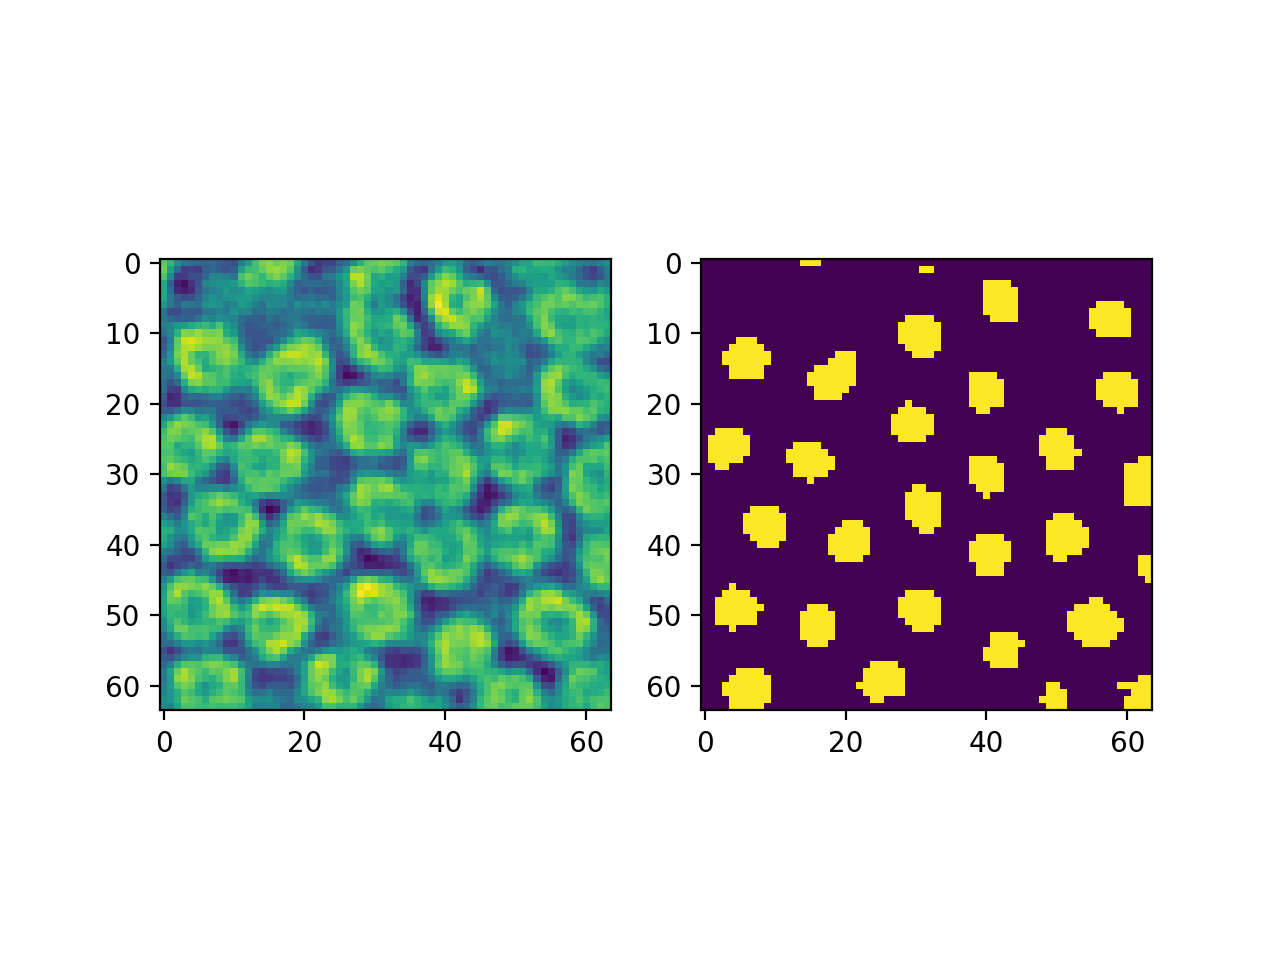

In [13]:
#%% Test the loaded model
data_dir = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/Group_0/'
im_names = glob.glob(data_dir + '*.tiff')
im_names.sort()

im = np.array(PIL.Image.open(os.path.join(data_dir, im_names[0])))
t = time.time()
V_prob = np.zeros((im.shape[0], im.shape[1], len(im_names)))
V_seg = np.zeros((im.shape[0], im.shape[1], len(im_names)))

for i, im_name in enumerate(im_names):
    im_new = np.array(PIL.Image.open(im_name))
    prob = model.segment_new(im_new)
    seg = insegtpy.utils.segment_probabilities(prob)
    seg[seg==0] = 1
    V_prob[i] = prob[1]
    V_seg[i] = seg
print(time.time()-t)

# Show the result
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_new)
ax[1].imshow(seg)
plt.show()